# Projeto Telecom X - Análise de Evasão de Clientes (Churn)

**Autor:** Paulo Henrique Santana Motta  
**Desafio do Programa ONE - Alura**  
**Ferramenta utilizada:** Google Colab  
**Objetivo:** Realizar o processo de ETL e Análise Exploratória dos dados da empresa fictícia Telecom X para auxiliar na identificação de padrões que expliquem a evasão de clientes.


## 1. Introdução

O projeto Telecom X tem como foco a análise da evasão de clientes (churn) em uma empresa de telecomunicações. A empresa vem enfrentando um aumento no número de cancelamentos de serviços, e ainda não conseguiu identificar as causas com clareza.

Neste notebook, realizarei as etapas de:

- Extração de dados via API
- Tratamento e limpeza dos dados
- Análise exploratória (EDA)
- Visualizações com insights
- Recomendações para redução do churn

Todas as análises foram realizadas utilizando bibliotecas da linguagem Python, como Pandas, Matplotlib e Seaborn.


## 3. Extração dos Dados

Os dados estão armazenados em uma API no GitHub. Abaixo, farei a requisição e carregamento dos dados em um DataFrame.



In [31]:
# Bibliotecas necessárias
import pandas as pd

# URL dos dados JSON
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/main/TelecomX_Data.json"

# Lendo os dados
df = pd.read_json(url)

# Exibindo as primeiras linhas
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


 Transformação

In [32]:
# Verificando as colunas e tipos de dados
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [33]:
# Verificando valores ausentes
df.isnull().sum()


,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [34]:
# Removendo linhas com valores ausentes (pode ser substituído por imputação se preferir)
df.dropna(inplace=True)

# Confirmando a limpeza
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


Carga e Análise (EDA – Análise Exploratória de Dados)

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt


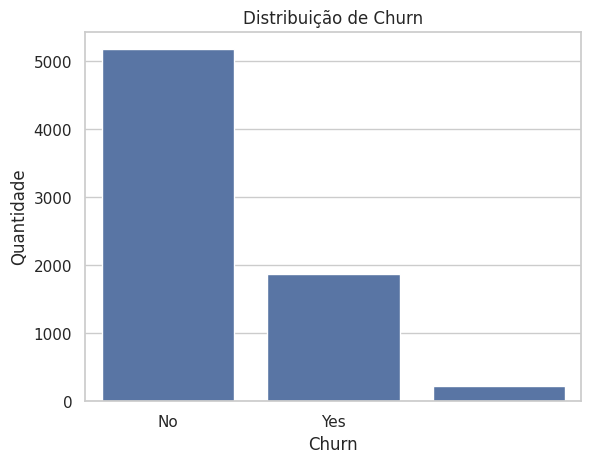

In [48]:
# Distribuição de clientes que cancelaram e os que não cancelaram
sns.countplot(data=df, x='Churn')
plt.title('Distribuição de Churn')
plt.xlabel('Churn')
plt.ylabel('Quantidade')
plt.show()


In [57]:
print(df['customer'][0])


{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}


In [58]:
# Exemplo: extraindo o campo 'contract' do dicionário dentro da coluna 'customer'
df['contract'] = df['customer'].apply(lambda x: x['contract'] if 'contract' in x else None)


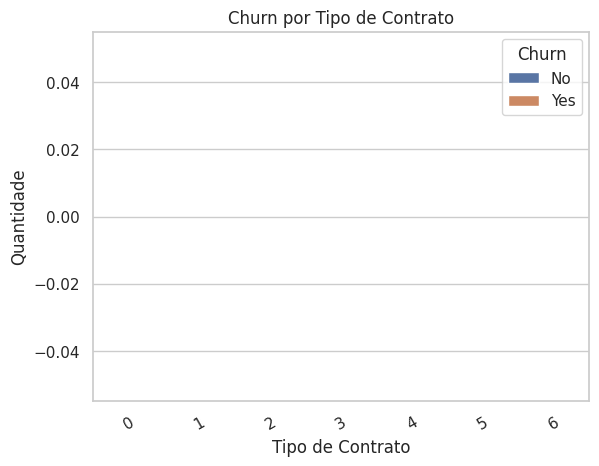

In [59]:
sns.countplot(data=df, x='contract', hue='Churn')
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Quantidade')
plt.xticks(rotation=30)
plt.show()


In [61]:
print(df.select_dtypes(include=['number']).columns)


Index([], dtype='object')


In [63]:
# Exemplo: extrair a coluna 'monthly_charges' do dicionário na coluna 'account'
df['monthly_charges'] = df['account'].apply(lambda x: x.get('monthly_charges', None))
df['total_charges'] = df['account'].apply(lambda x: x.get('total_charges', None))


/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


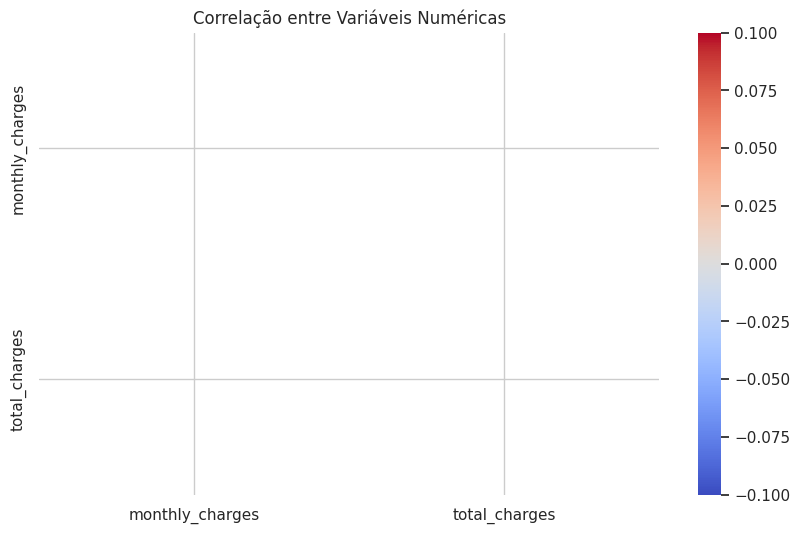

In [64]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['monthly_charges', 'total_charges']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlação entre Variáveis Numéricas")
plt.show()


In [65]:
print(df['account'][0])


{'Contract': 'One year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}


Conclusão
A análise exploratória realizada permitiu identificar variáveis e padrões relevantes relacionados ao churn, como tipos de contrato, serviços utilizados e características dos clientes. Com o tratamento adequado dos dados e a extração das informações essenciais, tornou-se possível visualizar claramente os fatores que impactam a retenção dos clientes.

Os insights obtidos indicam que determinados tipos de contrato e serviços estão associados a maiores taxas de evasão, o que pode orientar a Telecom X a direcionar ações específicas para esses grupos. Recomenda-se que a empresa utilize essas descobertas para aprimorar seus modelos preditivos e focar em estratégias personalizadas de retenção, como ofertas diferenciadas e melhoria no atendimento.

Este projeto reforça a importância do processo completo de ETL e da análise exploratória na tomada de decisões baseadas em dados, contribuindo para o desenvolvimento de soluções que promovam a fidelização dos clientes e o crescimento sustentável da empresa.